In [ ]:
# Objective: determine the correlation in the graphs created in the tableau dashboard titled "How is the NBA Evolving? (Feb 2023)"
# Method of Attack: use Pandas, Numpy, Seaborn, Matplotlib libraries to plot linear regression models and correlation heatmaps

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [2]:
# Reading excel file using pandas library
df = pd.read_excel('NBA_Time_Regression.xlsx')
print(df)


    season  3 Pointers Attempted  3 Pointers Made  Offensive Rebounds  \
0   2023.0                  34.2             12.3                10.5   
1   2022.0                  35.2             12.4                10.3   
2   2021.0                  34.6             12.7                 9.8   
3   2020.0                  34.1             12.2                10.1   
4   2019.0                  32.0             11.4                10.3   
..     ...                   ...              ...                 ...   
72     NaN                   NaN              NaN                 NaN   
73     NaN                   NaN              NaN                 NaN   
74     NaN                   NaN              NaN                 NaN   
75     NaN                   NaN              NaN                 NaN   
76     NaN                   NaN              NaN                 NaN   

    Defensive Rebounds  Assists  Turnovers  Points  3 Point Percentage  \
0                 33.0     25.0       14.4   114.

In [16]:
# Cleaning the data by removing NaN values 

df = df.dropna()
print(df)

In [17]:
# Converting the datatype for season into an integer

df = df.astype({"season": int})
print(df)

    season  3 Pointers Attempted  3 Pointers Made  Offensive Rebounds  \
0     2023                  34.2             12.3                10.5   
1     2022                  35.2             12.4                10.3   
2     2021                  34.6             12.7                 9.8   
3     2020                  34.1             12.2                10.1   
4     2019                  32.0             11.4                10.3   
5     2018                  29.0             10.5                 9.7   
6     2017                  27.0              9.7                10.1   
7     2016                  24.1              8.5                10.4   
8     2015                  22.4              7.8                10.9   
9     2014                  21.5              7.7                10.9   
10    2013                  20.0              7.2                11.2   
11    2012                  18.4              6.4                11.4   
12    2011                  18.0              6.5  

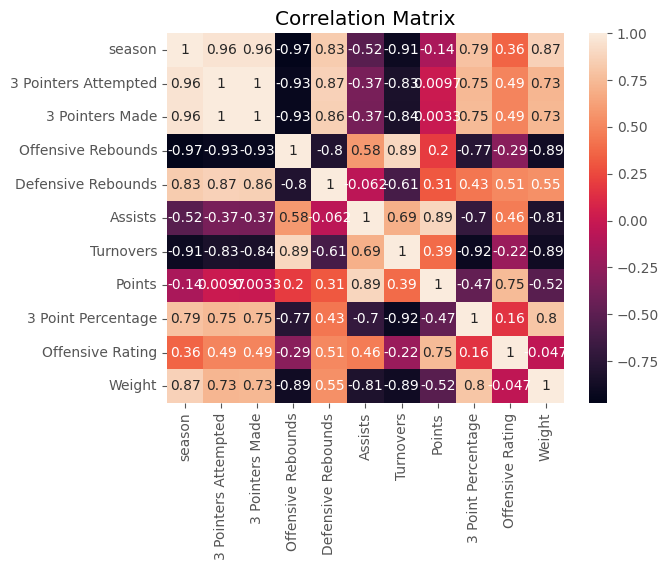

In [20]:
# Creating a correlation matrix using Pearson's correlation coefficient and visualizing it through a heatmap

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix')
plt.show()

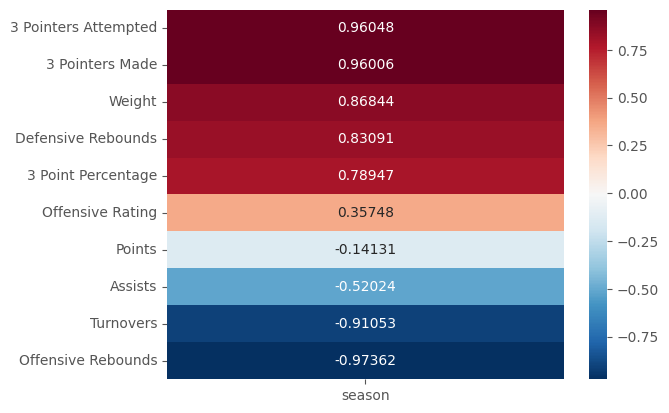

In [19]:
# I am only concerned with how the season (independant variable) affects various dependant variables. Therefore, I only want to see a correlation matrix that shows only 1 column with multiple row to visualize how season effects different variables such as 3 pointers attempted, offensive rebounds, etc.

correlation_target = correlation_matrix[['season']].drop(labels=['season'])
sns.heatmap(correlation_target.sort_values(by=['season'], ascending=False), annot = True, fmt = '0.5', cmap='RdBu_r')
plt.show()

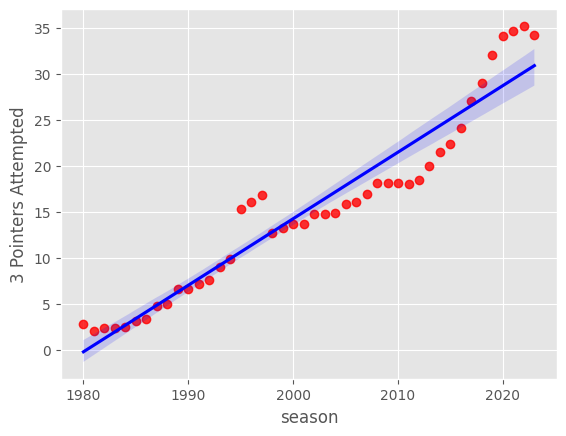

In [26]:
# Plotting a linear regression model for the dependant variable that gives the highest positive correlation coefficient (3 Pointers Attempted)

three_pointers_attempted = sns.regplot(x = df['season'], y = df['3 Pointers Attempted'], data = df, scatter_kws = {"color": "red"}, line_kws= {"color": "blue"} )


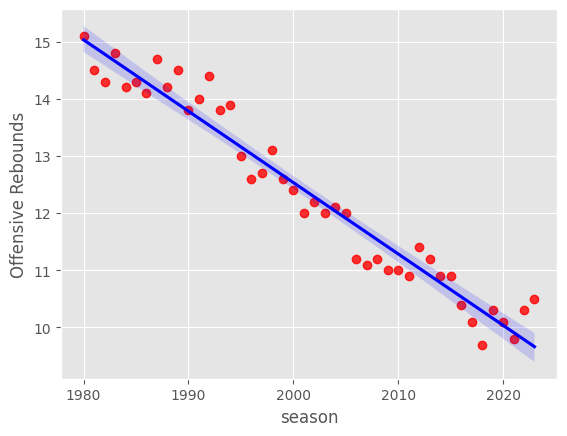

In [27]:
# Plotting a linear regression model for the dependant variable that gives the highest negative correlation coefficient (Offensive Rebounds)

offensive_rebounds = sns.regplot(x = df['season'], y = df['Offensive Rebounds'], data = df, scatter_kws = {"color": "red"}, line_kws= {"color": "blue"} )